# Tutorial 5: Seaborn
### Dr. Daugherity, PHYS 453 - Spring 2020

If Pandas gives us a beautiful way to store and analyze data, then Seaborn gives us a way to **visualize** it.
Seaborn is built on `matplotlib` and gives us an amazing tool that makes some data science problems easy!

**REFERENCES**
* https://seaborn.pydata.org/index.html


In [2]:
# Load libraries
import pandas as pd
import seaborn as sns   # ***NEW***
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Load Dataset 
We need a pandas dataframe to play with.  Seaborn makes this really easy.  The official list of csv files is: https://github.com/mwaskom/seaborn-data

In [3]:
sns.get_dataset_names()

C:\Users\msd97m\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\msd97m\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [4]:
data = sns.load_dataset('attention')

## Understanding the Data
Let's pretend we know **NOTHING** about this dataset.  What can we find?

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
Unnamed: 0    60 non-null int64
subject       60 non-null int64
attention     60 non-null object
solutions     60 non-null int64
score         60 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.5+ KB


In [6]:
data.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [7]:
data.columns

Index(['Unnamed: 0', 'subject', 'attention', 'solutions', 'score'], dtype='object')

In [14]:
# Whoops--he first column doesn't have a name.  Better clean this up
data = data.rename(columns={'Unnamed: 0': "test"})
data.columns

Index(['test', 'subject', 'attention', 'solutions', 'score'], dtype='object')

In [15]:
data.describe()

,test,subject,solutions,score
count,60.000000,60.000000,60.000000,60.000000
mean,29.500000,10.500000,2.000000,5.958333
std,17.464249,5.814943,0.823387,1.621601
min,0.000000,1.000000,1.000000,2.000000
25%,14.750000,5.750000,1.000000,5.000000
50%,29.500000,10.500000,2.000000,6.000000
75%,44.250000,15.250000,3.000000,7.000000
max,59.000000,20.000000,3.000000,9.000000


In [20]:
# How many subjects
data.subject.max()

# Note that data['subject'] and data.subject are equivalent

20

In [21]:
# Average score
data.score.mean()

5.958333333333333

# Visualize

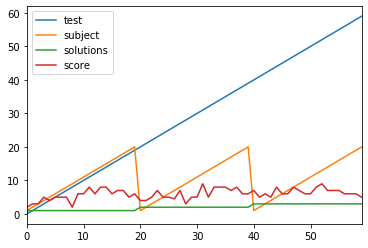

In [24]:
# Start with pandas plots
data.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000289B71D85C0>,
      dtype=object)

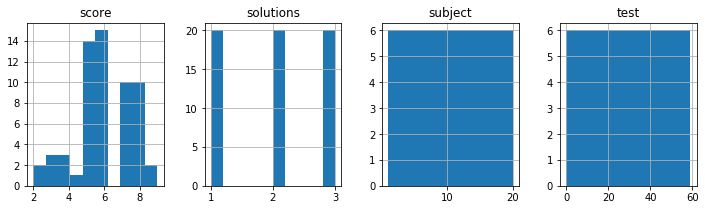

In [26]:
# Start with pandas plots
data.hist(figsize=(12,3),layout=(1,4))

While this is useful, please notice:
* it skips all non-numerical columns
* it is kinda ugly

Seaborn will fix these, but most importantly we will have a way to slice-and-dice the data

In [27]:
## Single Variable
There is 

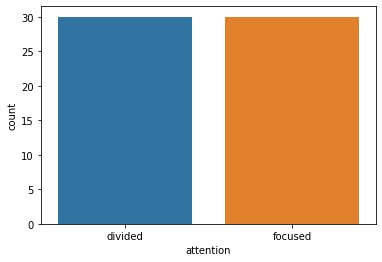

In [10]:
sns.countplot(x='attention', data=data)

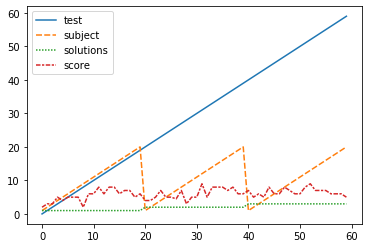

In [37]:
 sns.lineplot(data=data[['test', 'subject', 'solutions', 'score']])

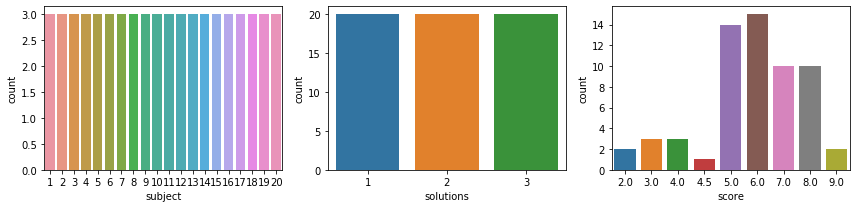

In [48]:
catvars = ['subject','solutions','score']

plt.figure(figsize=(12,3))

for i,cv in enumerate(catvars):
    plt.subplot(1,3,i+1)
    sns.countplot(x=cv, data=data)
   
plt.tight_layout()
plt.show()

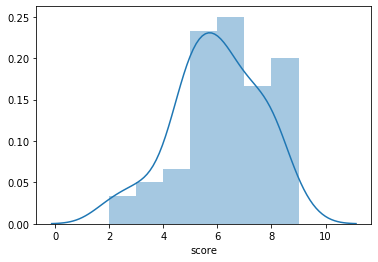

In [13]:
sns.distplot(data.score)

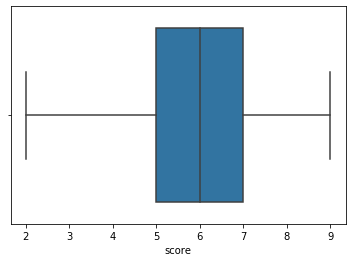

In [39]:
sns.boxplot(x='score',data=data)

# Showing Slices
Time for the magic!

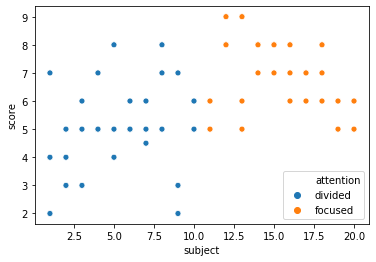

In [50]:
sns.scatterplot(x='subject',y='score',hue='attention',data=data)

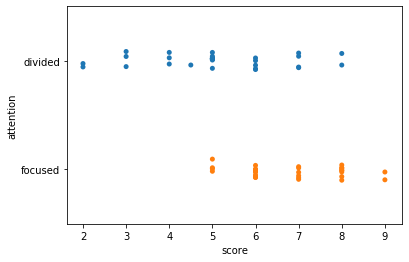

In [45]:
sns.stripplot(x='score',y='attention',data=data)

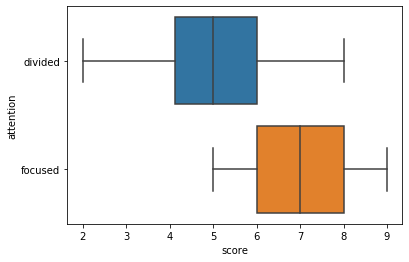

In [46]:
sns.boxplot(x='score',y='attention',data=data)

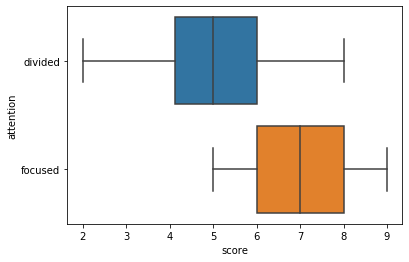

In [46]:
sns.boxplot(x='score',y='attention',data=data)

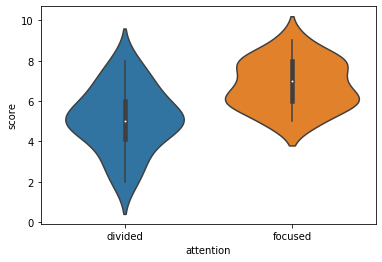

In [57]:
sns.violinplot(x='attention', y='score',data=data)

# Making Grids
Two extra cool functions are `relplot` and `catplot` that make grids based on rows and columns

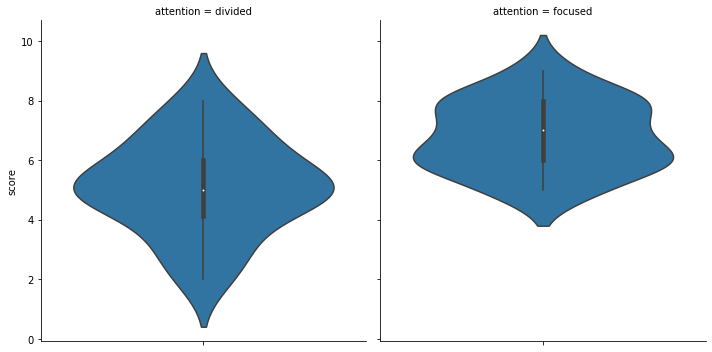

In [56]:
sns.catplot(y='score',data=data,col='attention',kind='violin')

# Other Stuff

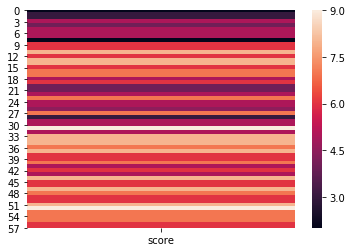

In [62]:
sns.heatmap(data[['score']])

In [64]:
data.head()

,test,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [66]:
subs = data.pivot(index='subject', columns='solutions', values='score')

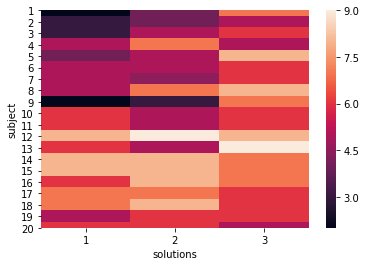

In [67]:
sns.heatmap(subs)